In [1]:
import warnings
import numpy as np
import seaborn as sns
from statistics import mean, stdev
import matplotlib.pyplot as plt
import random
warnings.simplefilter(action='ignore', category=FutureWarning)

1. Perform a Monte Carlo simulation to estimate the probability of hitting each section of a dartboard (where red, blue, green, purple and black circles drawn with big red circle followed by blue circle which is smaller in size and drawn inside the red circle with same point and then smaller green circle which is drawn inside blue and so on) and the long-term average score of the player. 
Use the Monte Carlo simulation for both values – do not simply use probabilities to calculate the estimates. Assume that any dart thrown at the dartboard will hit somewhere on the space. 

Generate N pairs of random numbers (x,y) and use the equation of a circle (x^2+y^2=r^2) to determine which space a given dart hits. For example, if your random number is (0.4,0.6), we know that r=√(〖0.4〗^2+〖0.6〗^2 )=0.721, which equates to a 1 point shot between the blue and red circles. The radius and point value for each section is given below:


Circle Color		Radius		Points(if within)

		Red			            1		                 1
		Blue			    0.7		                 2
		Green			    0.5		                 3
		Purple			    0.3		                 4
		Black			    0.1		                 5

In [2]:
def dartboard_simulation(N):
    total_score = 0
    hits = {'Red': 0, 'Blue': 0, 'Green': 0, 'Purple': 0, 'Black': 0, 'Outside': 0}
    for _ in range(N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distance = (x**2 + y**2)**0.5
        if distance <= 0.1:
            total_score += 5
            hits['Black'] += 1
        elif distance <= 0.3:
            total_score += 4
            hits['Purple'] += 1
        elif distance <= 0.5:
            total_score += 3
            hits['Green'] += 1
        elif distance <= 0.7:
            total_score += 2
            hits['Blue'] += 1
        elif distance <= 1:  # Outside the red circle
            total_score += 1
            hits['Red'] += 1
        else:
            hits['Outside'] += 1
    # Calculate probabilities
    probabilities = {key: value / N for key, value in hits.items()}
    # Calculate long-term average score per shot
    average_score_per_shot = total_score / N
    return probabilities, average_score_per_shot

def find_optimal_N(min_N, max_N, threshold=0.001, max_iterations=100):
    prev_score = None
    for N in range(min_N, max_N + 1, 1000):
        probabilities, average_score_per_shot = dartboard_simulation(N)
        if prev_score is not None:
            variation = abs(average_score_per_shot - prev_score)
            if variation < threshold or N == max_N:
                return N, probabilities, average_score_per_shot
        prev_score = average_score_per_shot
    return max_N, None, None

min_N = 400
max_N = 20000
optimal_N, probabilities, average_score_per_shot = find_optimal_N(min_N, max_N)

print("Optimal value of N:", optimal_N)
print("Probabilities of hitting each section:")
for color, probability in probabilities.items():
    print(f"{color}: {probability:.4f}")
print("\nLong-term average score per shot with optimal N:", average_score_per_shot)


Optimal value of N: 12400
Probabilities of hitting each section:
Red: 0.3960
Blue: 0.1961
Green: 0.1238
Purple: 0.0623
Black: 0.0087
Outside: 0.2131

Long-term average score per shot with optimal N: 1.4525


2.  A bicycle shop, Take a Bike, offers bonuses to its sales team for selling more than 4 bicycles in a day. Each salesperson can sell between 0 and 8 bikes per day and has a 40% probability of selling more than 4 bicycles in any given day (60% probability of selling 4 or fewer). If the salesperson sells more than 4 bikes, the probability of selling 5, 6, 7, or 8 bikes is shown below. The bonus that is paid is dependent on the model of each bike sold, each of which has a different probability of sale and bonus payout (also shown below). If the salesperson sells more than 4 bikes, the bonus is paid for each of the bikes sold, not just the number above 4. So if a salesperson sells 6 bikes, the bonus is paid for each of those 6 bikes, not just the 2 above the threshold. Develop a simulation model to calculate the bonus a salesperson can expect in a day. Do not simply calculate expected values for this – use random numbers to determine the number and types of bikes sold. Ensure you iterate your simulation multiple times (between 400 and 20,000).


The mean daily bonus is $35.15.


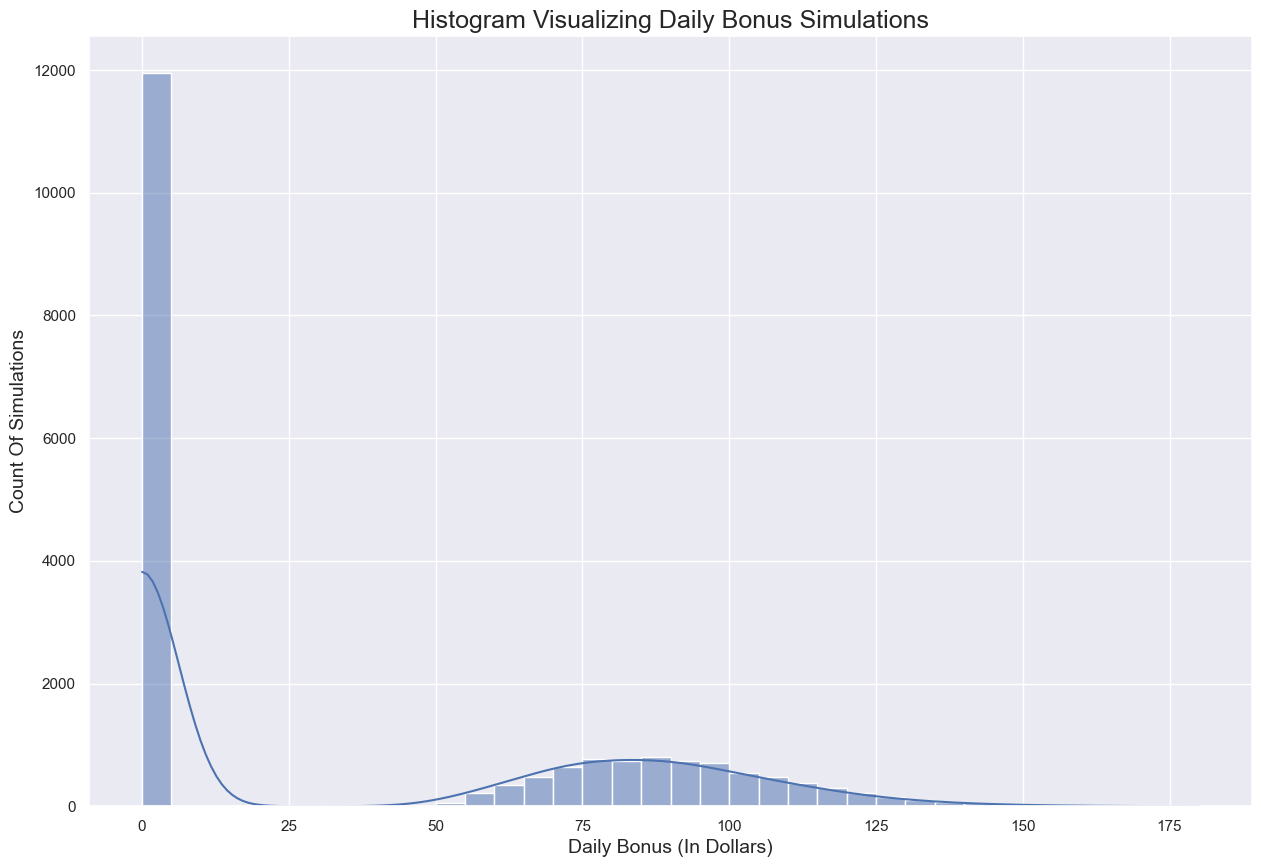

In [3]:
# Probability distributions
bonus_probability_distribution = [0.4, 0.35, 0.20, 0.05]
bike_models_probability_distribution = [0.45, 0.35, 0.15, 0.05]
model_bonus_values_list = [10, 15, 25, 30]

bonus_values_list = []

def bike_bonus_simulation(min_iterations, max_iterations):
    iterations = np.random.randint(min_iterations, max_iterations + 1)
    for k in range(iterations):
        bikes_sold = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8], p=[0.6, 0, 0, 0, 0, 0.4*0.40, 0.4*0.35, 0.4*0.20, 0.4*0.05])
        bonus = 0
        for _ in range(bikes_sold):
            model_index = np.random.choice(range(len(bike_models_probability_distribution)), p=bike_models_probability_distribution)
            bonus += model_bonus_values_list[model_index]
        bonus_values_list.append(bonus)

    mean_bike_bonus = sum(bonus_values_list) / iterations
            
    print(f"The mean daily bonus is ${round(mean_bike_bonus, 2)}.")

    # Plotting a histogram
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(15, 10))
    sns.histplot(bonus_values_list, binwidth=5, kde=True)
    plt.xlabel("Daily Bonus (In Dollars)", fontsize=14)
    plt.ylabel("Count Of Simulations", fontsize=14)
    plt.title("Histogram Visualizing Daily Bonus Simulations", fontsize=18)
    plt.savefig('Histogram Visualizing Daily Bonus Simulations.jpeg')
    plt.show()
bike_bonus_simulation(min_iterations=400, max_iterations=20000)

3.  Jim is investing in his company’s 401(k) retirement plan, funding 6% of his salary to get a 3% match (thus effectively investing 9% of his annual salary). He invests in each of the three available funds. 50% of his contributions go into investment A, which has an average return of 6.91% with a standard deviation of 12.89%. The rest of his contributions are equally divided between investment B, which has an average return of 8.94% with a standard deviation of 15.21%, and investment C, which has an average return of 9.88% with a standard deviation of 17.14%. Jim is currently 24 years old and earns $55,000 this year, but anticipates a pay raise of, on average, 2.83% with a standard deviation of 0.72%. Develop a simulation model to predict his 401(k) balance at age 60. Ensure you iterate your simulation multiple times (between 400 and 20,000).

The mean amount accrued in the 401ks in this simulation study is $1545940.79.



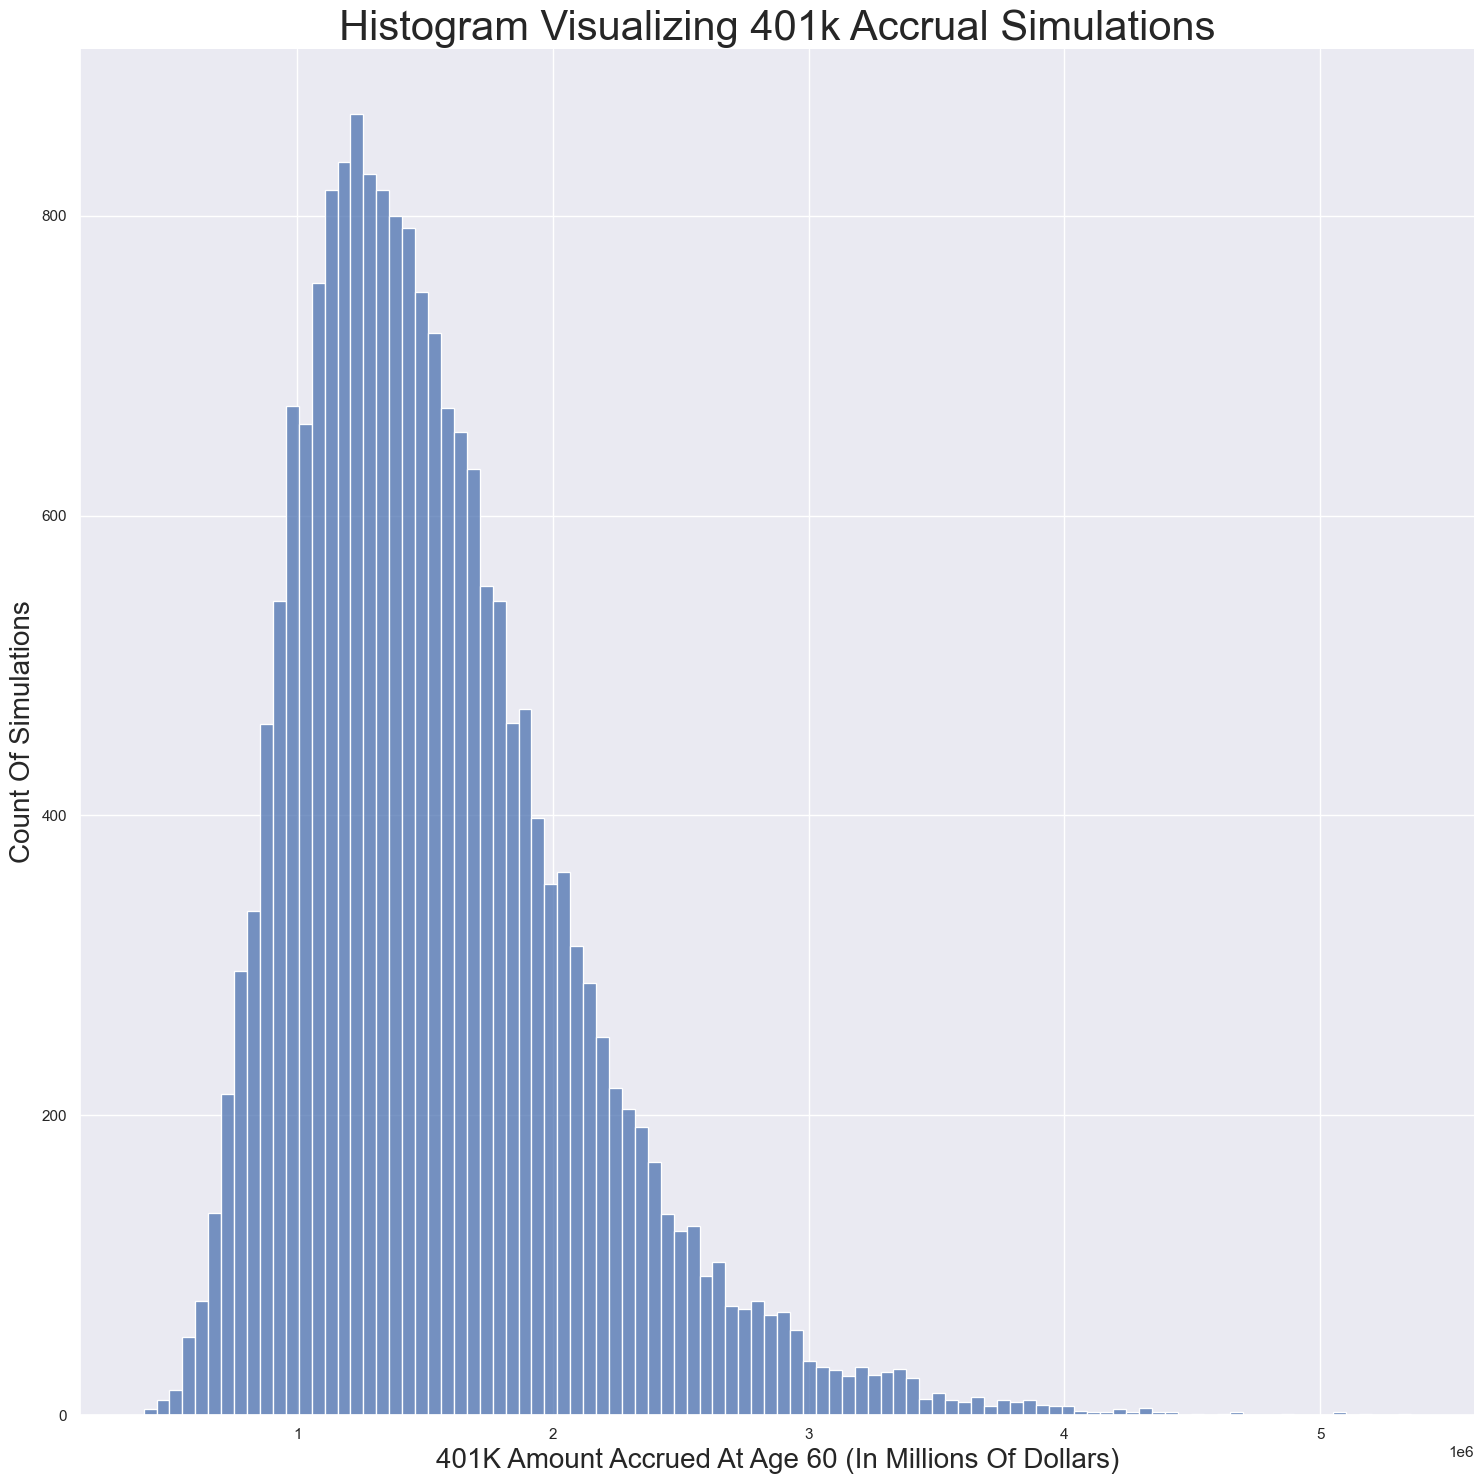

In [4]:
np.random.seed(42)  # Set random seed for reproducibility

wealth_accured_list = []
def retirement_account_simulator(min_number_of_simulations, max_number_of_simulations):
    for i in range(min_number_of_simulations, max_number_of_simulations + 1):
    
        # Simulate random fund annual returns and random annual raises
        investment_A_returns = list(np.random.normal(0.0691, 0.1289, 37))
        investment_B_returns = list(np.random.normal(0.0894, 0.1521, 37))
        investment_C_returns = list(np.random.normal(0.0988, 0.1714, 37))
        annual_raises = list(np.random.normal(0.0283, 0.0072, 37))

        # Calculate Jim's salary in each year
        annual_salaries = [55000]

        for i in range(0, 36):
            annual_salaries.append((1+annual_raises[i])*annual_salaries[i])

        # Calculate the annual contributions to each fund in each year
        annual_A_contributions = []
        annual_B_contributions = []
        annual_C_contributions = []

        for i in range(0, 37):
            annual_A_contributions.append(annual_salaries[i] * 0.09 * 0.5)
            annual_B_contributions.append(annual_salaries[i] * 0.09 * 0.25)
            annual_C_contributions.append(annual_salaries[i] * 0.09 * 0.25)

        # Calculate the beginning and end of year 401k values in each fund for the first year (when Jim is 24) 
        start_of_year_A = [annual_A_contributions[0]]
        start_of_year_B = [annual_B_contributions[0]]
        start_of_year_C = [annual_C_contributions[0]]

        end_of_year_A = [annual_A_contributions[0] * (1 + investment_A_returns[0])]
        end_of_year_B = [annual_B_contributions[0] * (1 + investment_B_returns[0])]
        end_of_year_C = [annual_C_contributions[0] * (1 + investment_C_returns[0])]
        end_of_year_401ks = [end_of_year_A[0] + end_of_year_B[0] + end_of_year_C[0]]

        # Calculate the beginning and end of year 401k values in each fund for the next 36 years (when Jim is 25 - 60)
        # Note that we add all of Michael's contributions at the start of the year so that they can fully accrue interest that year
        # Also, note that we rebalance the portfolio (50% in A, 25% in B, and 25% in C) at the start of each year as well
        for i in range(1, 37):
            start_of_year_A.append((end_of_year_401ks[i - 1] * 0.5) + annual_A_contributions[i])
            start_of_year_B.append((end_of_year_401ks[i - 1] * 0.25) + annual_B_contributions[i])
            start_of_year_C.append((end_of_year_401ks[i - 1] * 0.25) + annual_C_contributions[i])

            end_of_year_A.append(start_of_year_A[i] * (1 + investment_A_returns[i]))
            end_of_year_B.append(start_of_year_B[i] * (1 + investment_B_returns[i]))
            end_of_year_C.append(start_of_year_C[i] * (1 + investment_C_returns[i]))

            end_of_year_401ks.append(end_of_year_A[i] + end_of_year_B[i] + end_of_year_C[i])

        # Find the total wealth accrued in the 401K account at the end of the year when Michael is 60
        wealth_accured_list.append(round(end_of_year_401ks[-1],2))
    
retirement_account_simulator(400, 20000)

mean_401k_ammount = round(mean(wealth_accured_list),2)

print(f"The mean amount accrued in the 401ks in this simulation study is ${mean_401k_ammount}.\n" )

sns.set_theme(style="darkgrid")


sns.displot( wealth_accured_list, height = 15)

plt.xlabel("401K Amount Accrued At Age 60 (In Millions Of Dollars)", fontsize = 20)
plt.ylabel("Count Of Simulations", fontsize = 20)
plt.title("Histogram Visualizing 401k Accrual Simulations", fontsize = 30)
plt.tight_layout()
plt.savefig('Histogram Visualizing 401k Accrual Simulations.jpeg')
plt.show()

**Question. 4** Develop a simple heuristic (I recommend a construction or destruction heuristic) in either R or Python to solve the following knapsack problem: (Note, this problem can be solved to optimality using integer programming; however, the focus of this question is on developing a heuristic and metaheuristic). Then, develop a metaheuristic using your heuristic as a subroutine. You can iterate the heuristic n times and return the best solution, prevent previous solutions from being selected, etc. I am evaluating your ability to find a solution quickly with a heuristic and your approach to improve the heuristic with a metaheuristic.
Maximize 	12x1 + 16x2 + 22x3 + 8x4
S.T.		4x1 + 5x2 + 7x3 + 3x4 ≤ 140
		    0 ≤ xi ≤ 10 and xi is integer


In [5]:
# Define the objective function
def objective(x):
    x1, x2, x3, x4 = x
    return 12*x1 + 16*x2 + 22*x3 + 8*x4

# Define the constraint function
def constraint(x):
    x1, x2, x3, x4 = x
    return 4*x1 + 5*x2 + 7*x3 + 3*x4

# Define the greedy construction heuristic
def greedy_heuristic():
    knapsack_capacity = 140
    items = [(12, 4), (16, 5), (22, 7), (8, 3)]  # (value, weight) pairs
    solution = [0, 0, 0, 0]  # Initialize solution
    remaining_capacity = knapsack_capacity
    
    # Greedy selection of items
    for i, (value, weight) in enumerate(items):
        if weight <= remaining_capacity:
            solution[i] = min(int(remaining_capacity / weight), 10)  # Ensure x_i <= 10
            remaining_capacity -= solution[i] * weight
    
    return solution

# Define the neighborhood search function for simulated annealing
def neighbor(solution):
    idx = np.random.randint(0, 4)  # Randomly select an index
    new_solution = solution.copy()
    new_solution[idx] = np.random.randint(0, min(solution[idx] + 1, 11))  # Change the selected item
    
    return new_solution

# Define the acceptance probability function for simulated annealing
def acceptance_probability(curr_val, new_val, T):
    if new_val > curr_val:
        return 1.0
    else:
        return np.exp((new_val - curr_val) / T)

# Define the simulated annealing metaheuristic
def simulated_annealing(solution, max_iter=1000):
    T = 1.0
    T_min = 0.0001
    alpha = 0.9
    curr_val = objective(solution)
    best_solution = solution
    best_val = curr_val

    for _ in range(max_iter):
        new_solution = neighbor(solution)
        new_val = objective(new_solution)
        if constraint(new_solution) <= 140:  # Check feasibility
            if acceptance_probability(curr_val, new_val, T) > np.random.random():
                solution = new_solution
                curr_val = new_val
                if new_val > best_val:
                    best_solution = new_solution
                    best_val = new_val

        T *= alpha
        if T < T_min:
            break

    return best_solution

# Main function
def main():
    # Greedy construction heuristic
    initial_solution = greedy_heuristic()
    print("Initial Solution (Greedy Heuristic):", initial_solution)
    print("Objective Value (Greedy Heuristic):", objective(initial_solution))

    # Simulated annealing metaheuristic
    final_solution = simulated_annealing(initial_solution)
    print("\nFinal Solution (Simulated Annealing Metaheuristic):", final_solution)
    print("Objective Value (Simulated Annealing Metaheuristic):", objective(final_solution))

if __name__ == "__main__":
    main()


Initial Solution (Greedy Heuristic): [10, 10, 7, 0]
Objective Value (Greedy Heuristic): 434

Final Solution (Simulated Annealing Metaheuristic): [10, 10, 7, 0]
Objective Value (Simulated Annealing Metaheuristic): 434


**Question.5** Develop a simulated annealing procedure in either R or Python to solve the same knapsack problem: (Note, this problem can be solved to optimality using integer programming; however, the focus of this question is on developing the simulated annealing method). Do not simply return a shell code from a web search, but try to implement the simulated annealing metaheuristic for this specific problem.

Maximize 	12x1 + 16x2 + 22x3 + 8x4

S.T.        4x1 + 5x2 + 7x3 + 3x4 ≤ 140

            
0 ≤ xi ≤ 10 and xi is integer


In [6]:
# start the values off at an extreme
x1, x2, x3, x4 = 0, 0, 0, 0
z1, z2, z3, z4 = 0, 0, 0, 0

# number of epochs
N=100

curr_sol = None

def objective(x1, x2, x3, x4):
    return 12*x1 + 16*x2 + 22*x3 + 8*x4

def constraint(x1, x2, x3, x4):
    return 4*x1 + 5*x2 + 7*x3 + 3*x4

def evaluate(curr_sol, ys, zs):
    y1, y2, y3, y4 = ys
    z1, z2, z3, z4 = zs
    candidate_sol = objective(y1, y2, y3, y4)
    
    if constraint(y1, y2, y3, y4) <= 140: # Update the constraint value
        if curr_sol is None: # if no valid solution has yet been found
            return candidate_sol, y1, y2, y3, y4
        
        diff = candidate_sol - curr_sol
        print("difference between candidate and current best", diff)
        if diff > 0:
            print("accept new")
            return candidate_sol, y1, y2, y3, y4
        else:
            print("not more optimal. skip")
            return curr_sol, z1, z2, z3, z4
            
    print('constraint violated. skip')
    return curr_sol, z1, z2, z3, z4

for i in range(N):
    # randomly reassign 1 value
    exec("%s = %d" % (np.random.choice(['x1', 'x2', 'x3', 'x4']), np.random.randint(0,11)))
    
    curr_sol, z1, z2, z3, z4 = evaluate(curr_sol, (x1, x2, x3, x4), (z1, z2, z3, z4))
    
print("final:\n\tx1: {}\n\t x2: {}\n\t x3: {}\n\t x4: {}\n\tobjective: {}".format(z1, z2, z3, z4, curr_sol))


difference between candidate and current best 64
accept new
difference between candidate and current best 154
accept new
difference between candidate and current best -64
not more optimal. skip
difference between candidate and current best 56
accept new
difference between candidate and current best -22
not more optimal. skip
difference between candidate and current best -150
not more optimal. skip
difference between candidate and current best -150
not more optimal. skip
difference between candidate and current best -194
not more optimal. skip
difference between candidate and current best -62
not more optimal. skip
difference between candidate and current best -62
not more optimal. skip
difference between candidate and current best -84
not more optimal. skip
difference between candidate and current best -20
not more optimal. skip
constraint violated. skip
difference between candidate and current best -12
not more optimal. skip
difference between candidate and current best -188
not more 